In [1]:
import pandas as pd
import sqlite3

# Paths to the datasets
corrected_csv_path = '../data/processed/Merged_Canada_HPI_Interet_Rate.csv'
new_dataset_path = '../data/processed/combined_withNaN.csv'

# Load the existing and new datasets
existing_df = pd.read_csv(corrected_csv_path)
new_df = pd.read_csv(new_dataset_path)

# Filter the new dataset for Canada only
new_df_canada = new_df[new_df['Province'] == 'Canada'].copy()



In [2]:
new_df_canada

,Province,Month-Year,Unemployment Rate,Minimum Wage,Immigration Num,All-items CPI,All industries GDP,Active businesses,Opening businesses,Closing businesses
0,Canada,Jan-1976,7.1,$2.60,NaN,30.3,NaN,NaN,NaN,NaN
1,Canada,Feb-1976,7.0,$2.60,NaN,30.5,NaN,NaN,NaN,NaN
2,Canada,Mar-1976,6.7,$2.60,NaN,30.6,NaN,NaN,NaN,NaN
3,Canada,Apr-1976,6.8,$2.90,NaN,30.7,NaN,NaN,NaN,NaN
4,Canada,May-1976,6.9,$2.90,NaN,30.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
576,Canada,Jan-2024,5.7,$16.65,60775.0,158.3,"2,213,866",938877.0,44872.0,43292.0
577,Canada,Feb-2024,5.8,$16.65,51585.0,158.8,"2,219,098",938895.0,43594.0,43395.0
578,Canada,Mar-2024,6.1,$16.65,52395.0,159.8,"2,218,353",939242.0,42851.0,43199.0
579,Canada,Apr-2024,6.1,$17.30,68645.0,160.6,"2,225,966",939515.0,43059.0,42537.0


In [3]:
# Convert 'Month-Year' to datetime format for alignment
new_df_canada['Month-Year'] = pd.to_datetime(new_df_canada['Month-Year'], format='%b-%Y')
new_df_canada['Month-Year'] = new_df_canada['Month-Year'].dt.strftime('%Y-%m')

# Merge the datasets on 'Date' and 'Month-Year'
merged_df = pd.merge(existing_df, new_df_canada, left_on='Date', right_on='Month-Year', how='inner')



In [4]:
merged_df

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,Province,Month-Year,Unemployment Rate,Minimum Wage,Immigration Num,All-items CPI,All industries GDP,Active businesses,Opening businesses,Closing businesses
0,2005-01,100.0,100.0,100.0,100.0,100.0,100.0,239800,260400,207700,...,Canada,2005-01,6.9,NaN,NaN,105.3,"1,591,349",NaN,NaN,NaN
1,2005-02,100.3,100.2,100.3,100.1,100.3,100.6,240500,261000,208400,...,Canada,2005-02,7.0,NaN,NaN,105.7,"1,592,499",NaN,NaN,NaN
2,2005-03,100.6,100.6,100.7,100.5,100.6,101.1,241300,261900,209200,...,Canada,2005-03,6.9,NaN,NaN,106.3,"1,587,122",NaN,NaN,NaN
3,2005-04,100.9,100.8,101.2,100.6,100.8,101.5,242000,262600,210100,...,Canada,2005-04,6.7,NaN,NaN,106.6,"1,598,907",NaN,NaN,NaN
4,2005-05,101.2,101.1,101.4,100.8,101.0,102.0,242600,263200,210600,...,Canada,2005-05,7.0,NaN,NaN,106.7,"1,605,776",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2024-01,300.5,304.4,294.5,306.6,329.7,308.8,720600,792600,611600,...,Canada,2024-01,5.7,$16.65,60775.0,158.3,"2,213,866",938877.0,44872.0,43292.0
229,2024-02,300.3,304.6,294.8,307.0,328.8,306.6,720000,793200,612200,...,Canada,2024-02,5.8,$16.65,51585.0,158.8,"2,219,098",938895.0,43594.0,43395.0
230,2024-03,299.5,304.9,295.1,306.7,329.1,305.5,718300,794000,612900,...,Canada,2024-03,6.1,$16.65,52395.0,159.8,"2,218,353",939242.0,42851.0,43199.0
231,2024-04,299.5,304.7,295.8,306.9,328.2,304.2,718300,793500,614400,...,Canada,2024-04,6.1,$17.30,68645.0,160.6,"2,225,966",939515.0,43059.0,42537.0


In [5]:
# Drop unnecessary columns like 'Province' and 'Month-Year' from the merged dataset
merged_df = merged_df.drop(columns=['Province', 'Month-Year'])



In [7]:
# Check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]

missing_values


Minimum Wage          204
Immigration Num       120
Active businesses     121
Opening businesses    121
Closing businesses    121
dtype: int64

In [8]:
merged_df = merged_df.drop(columns=['Minimum Wage'])

In [9]:
merged_df

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,Townhouse_Benchmark_SA,Apartment_Benchmark_SA,Interest Rate,Unemployment Rate,Immigration Num,All-items CPI,All industries GDP,Active businesses,Opening businesses,Closing businesses
0,2005-01,100.0,100.0,100.0,100.0,100.0,100.0,239800,260400,207700,...,201700,172000,2.50,6.9,NaN,105.3,"1,591,349",NaN,NaN,NaN
1,2005-02,100.3,100.2,100.3,100.1,100.3,100.6,240500,261000,208400,...,202300,173000,2.50,7.0,NaN,105.7,"1,592,499",NaN,NaN,NaN
2,2005-03,100.6,100.6,100.7,100.5,100.6,101.1,241300,261900,209200,...,202900,173900,2.49,6.9,NaN,106.3,"1,587,122",NaN,NaN,NaN
3,2005-04,100.9,100.8,101.2,100.6,100.8,101.5,242000,262600,210100,...,203300,174600,2.49,6.7,NaN,106.6,"1,598,907",NaN,NaN,NaN
4,2005-05,101.2,101.1,101.4,100.8,101.0,102.0,242600,263200,210600,...,203700,175400,2.49,7.0,NaN,106.7,"1,605,776",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2024-01,300.5,304.4,294.5,306.6,329.7,308.8,720600,792600,611600,...,665000,531100,5.03,5.7,60775.0,158.3,"2,213,866",938877.0,44872.0,43292.0
229,2024-02,300.3,304.6,294.8,307.0,328.8,306.6,720000,793200,612200,...,663100,527400,5.02,5.8,51585.0,158.8,"2,219,098",938895.0,43594.0,43395.0
230,2024-03,299.5,304.9,295.1,306.7,329.1,305.5,718300,794000,612900,...,663700,525400,5.00,6.1,52395.0,159.8,"2,218,353",939242.0,42851.0,43199.0
231,2024-04,299.5,304.7,295.8,306.9,328.2,304.2,718300,793500,614400,...,662000,523200,5.00,6.1,68645.0,160.6,"2,225,966",939515.0,43059.0,42537.0


In [11]:
# Save the final merged dataset to a CSV file
final_csv_path = '../data/processed/Final_Merged_Canada_Dataset.csv'
merged_df.to_csv(final_csv_path, index=False)

# Output the path to the final merged dataset
final_csv_path

'../data/processed/Final_Merged_Canada_Dataset.csv'

### Overview of the Dataset

In [13]:
import pandas as pd

# Load the final merged dataset
final_csv_path = '../data/processed/Final_Merged_Canada_Dataset.csv'
df = pd.read_csv(final_csv_path)

# Get basic information about the dataset
df_info = df.info()

# Summary statistics
summary_stats = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

df_info, summary_stats, missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        233 non-null    object 
 1   Composite_HPI_SA            233 non-null    float64
 2   Single_Family_HPI_SA        233 non-null    float64
 3   One_Storey_HPI_SA           233 non-null    float64
 4   Two_Storey_HPI_SA           233 non-null    float64
 5   Townhouse_HPI_SA            233 non-null    float64
 6   Apartment_HPI_SA            233 non-null    float64
 7   Composite_Benchmark_SA      233 non-null    int64  
 8   Single_Family_Benchmark_SA  233 non-null    int64  
 9   One_Storey_Benchmark_SA     233 non-null    int64  
 10  Two_Storey_Benchmark_SA     233 non-null    int64  
 11  Townhouse_Benchmark_SA      233 non-null    int64  
 12  Apartment_Benchmark_SA      233 non-null    int64  
 13  Interest Rate               233 non

(None,
        Composite_HPI_SA  Single_Family_HPI_SA  One_Storey_HPI_SA  \
 count        233.000000            233.000000         233.000000   
 mean         190.552790            192.011159         185.959227   
 std           66.066092             67.861540          62.624109   
 min          100.000000            100.000000         100.000000   
 25%          135.000000            134.100000         137.700000   
 50%          166.400000            168.700000         162.100000   
 75%          227.700000            229.400000         214.300000   
 max          348.100000            357.500000         343.600000   
 
        Two_Storey_HPI_SA  Townhouse_HPI_SA  Apartment_HPI_SA  \
 count         233.000000        233.000000        233.000000   
 mean          192.576395        197.362232        191.563090   
 std            69.224591         75.175927         65.897592   
 min           100.000000        100.000000        100.000000   
 25%           132.000000        140.200000  

### Visualize Distributions

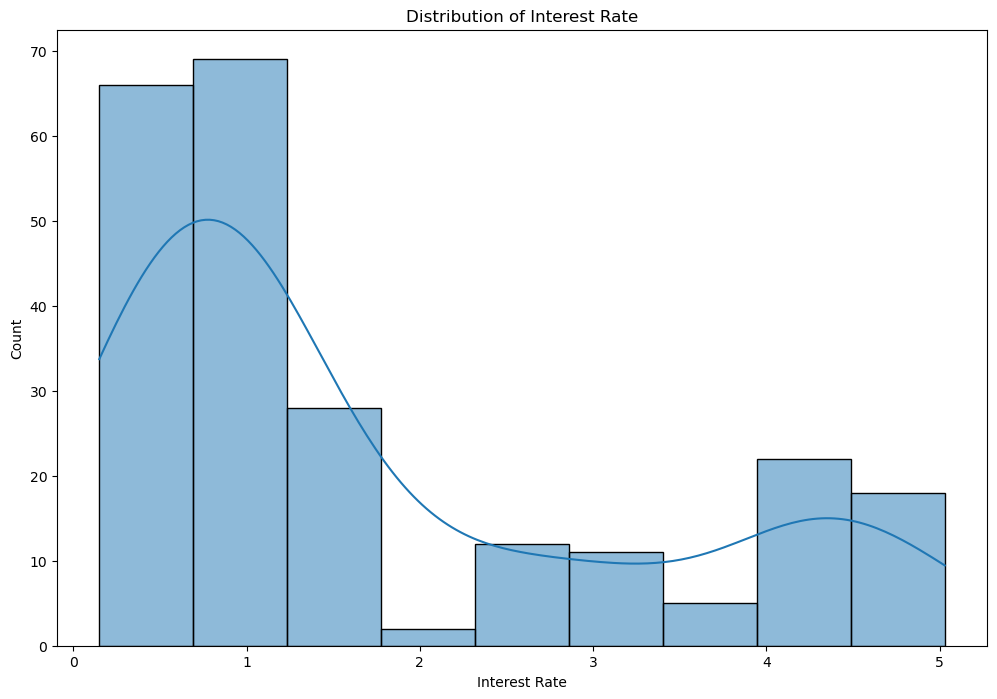

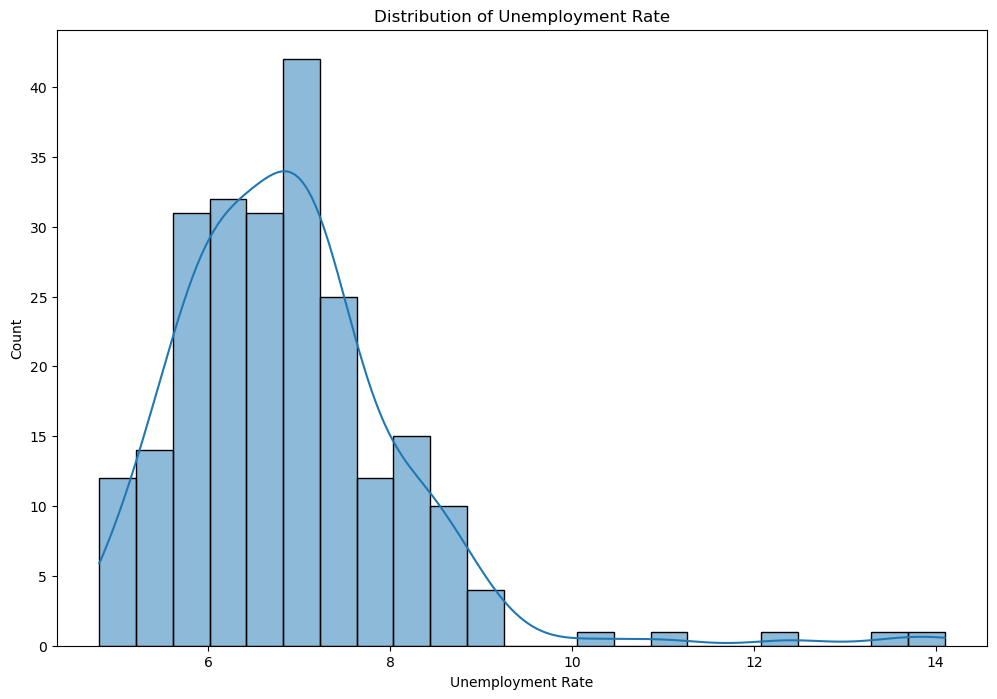

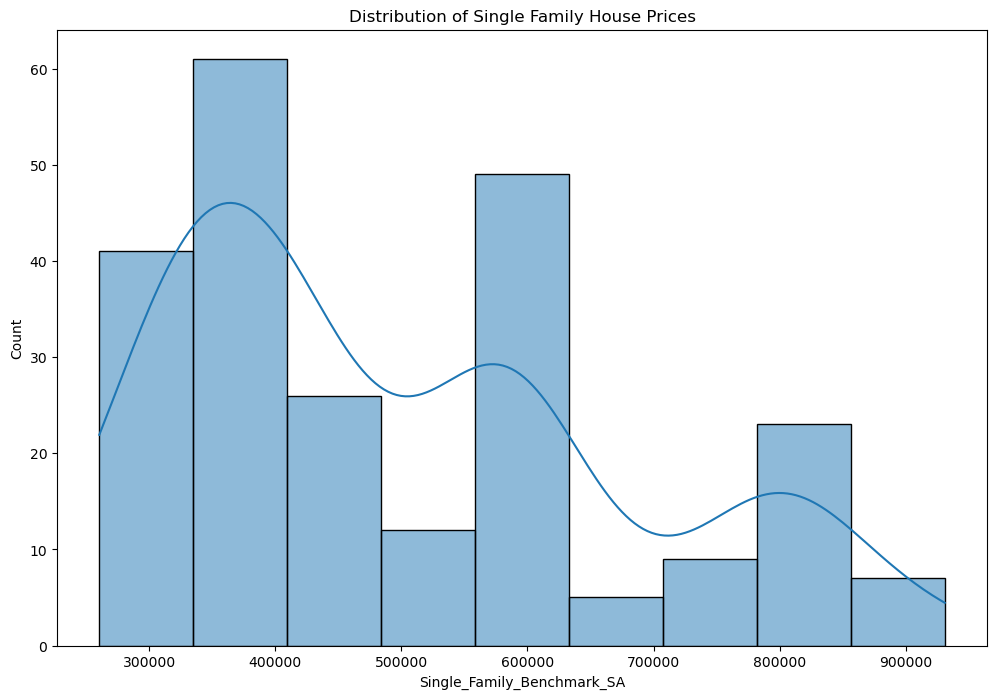

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of key numerical columns
plt.figure(figsize=(12, 8))
sns.histplot(df['Interest Rate'].dropna(), kde=True)
plt.title('Distribution of Interest Rate')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['Unemployment Rate'].dropna(), kde=True)
plt.title('Distribution of Unemployment Rate')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['Single_Family_Benchmark_SA'].dropna(), kde=True)
plt.title('Distribution of Single Family House Prices')
plt.show()
# Add more plots as needed for other variables


### Correlation Analysis

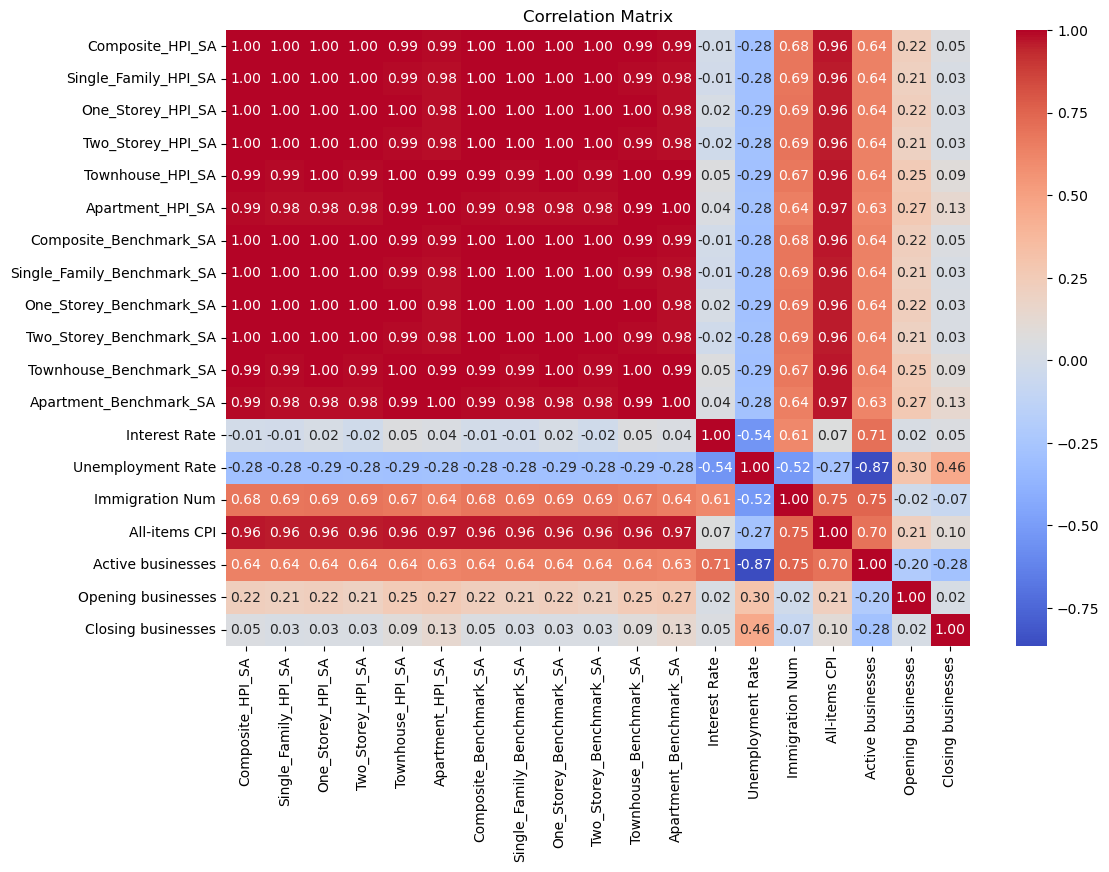

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the final merged dataset
final_csv_path = '../data/processed/Final_Merged_Canada_Dataset.csv'
df = pd.read_csv(final_csv_path)

# Drop non-numeric columns (like 'Date')
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



The correlation matrix provides some insights into the relationships between different variables in the dataset. Here are some key takeaways:

1. **Strong Positive Correlations:**

    - **Housing Price Indexes (HPI):** The various housing price indexes (e.g., Composite_HPI_SA, Single_Family_HPI_SA, etc.) are all highly correlated with each other, with correlation coefficients close to 1.0. This indicates that as one type of housing price increases, the others tend to increase as well.

    - **Benchmark Prices:** Similarly, the benchmark prices for different housing types (e.g., Composite_Benchmark_SA, Single_Family_Benchmark_SA) are also highly correlated with each other and with the corresponding HPI values.
    
    - **CPI (Consumer Price Index):** The All-items CPI shows a strong positive correlation with the housing prices and benchmarks, suggesting that as consumer prices rise, housing prices also tend to rise.

2. **Negative Correlations:**

    - **Interest Rate and Housing Prices:** The Interest Rate shows a weak to very weak negative correlation with the housing price indexes (correlations close to -0.01 to -0.05). This suggests that higher interest rates might slightly discourage housing prices, but the effect is not strong in your data.

    - **Unemployment Rate and Housing Prices:** The Unemployment Rate has a moderate negative correlation with housing prices (around -0.28 to -0.29), which suggests that higher unemployment rates tend to be associated with lower housing prices.

3. **Other Observations:**

    - **Immigration and Economic Activity:** The Immigration Num has a moderate positive correlation with various economic indicators, such as Active businesses, Opening businesses, and All-items CPI. This could indicate that higher immigration is associated with increased economic activity and possibly higher prices.

    - **Business Activity:** Active businesses, Opening businesses, and Closing businesses have varying correlations with other economic indicators Notably, Active businesses is negatively correlated with the Unemployment Rate, which makes sense as more active businesses often correspond to lower unemployment.

**Summary:**

- The correlation matrix helps to confirm some economic intuitions, such as the relationship between interest rates and housing prices, as well as unemployment and housing prices. It also reveals the interrelated nature of different types of housing price indexes and benchmarks, as well as the impact of broader economic factors like CPI and immigration on housing and business activity.

### Handle Missing Values

In [18]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]



Immigration Num       120
Active businesses     121
Opening businesses    121
Closing businesses    121
dtype: int64

##### Impute Missing Values

In [21]:
# Backward fill 
df_bfill = df.bfill()


In [22]:
df_bfill

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,Townhouse_Benchmark_SA,Apartment_Benchmark_SA,Interest Rate,Unemployment Rate,Immigration Num,All-items CPI,All industries GDP,Active businesses,Opening businesses,Closing businesses
0,2005-01,100.0,100.0,100.0,100.0,100.0,100.0,239800,260400,207700,...,201700,172000,2.50,6.9,18690.0,105.3,"1,591,349",869922.0,42433.0,36132.0
1,2005-02,100.3,100.2,100.3,100.1,100.3,100.6,240500,261000,208400,...,202300,173000,2.50,7.0,18690.0,105.7,"1,592,499",869922.0,42433.0,36132.0
2,2005-03,100.6,100.6,100.7,100.5,100.6,101.1,241300,261900,209200,...,202900,173900,2.49,6.9,18690.0,106.3,"1,587,122",869922.0,42433.0,36132.0
3,2005-04,100.9,100.8,101.2,100.6,100.8,101.5,242000,262600,210100,...,203300,174600,2.49,6.7,18690.0,106.6,"1,598,907",869922.0,42433.0,36132.0
4,2005-05,101.2,101.1,101.4,100.8,101.0,102.0,242600,263200,210600,...,203700,175400,2.49,7.0,18690.0,106.7,"1,605,776",869922.0,42433.0,36132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2024-01,300.5,304.4,294.5,306.6,329.7,308.8,720600,792600,611600,...,665000,531100,5.03,5.7,60775.0,158.3,"2,213,866",938877.0,44872.0,43292.0
229,2024-02,300.3,304.6,294.8,307.0,328.8,306.6,720000,793200,612200,...,663100,527400,5.02,5.8,51585.0,158.8,"2,219,098",938895.0,43594.0,43395.0
230,2024-03,299.5,304.9,295.1,306.7,329.1,305.5,718300,794000,612900,...,663700,525400,5.00,6.1,52395.0,159.8,"2,218,353",939242.0,42851.0,43199.0
231,2024-04,299.5,304.7,295.8,306.9,328.2,304.2,718300,793500,614400,...,662000,523200,5.00,6.1,68645.0,160.6,"2,225,966",939515.0,43059.0,42537.0


In [23]:
# Save the final imputed dataset to a CSV file (using df_ffill or df_bfill depending on your preference)
imputed_csv_path = '../data/processed/Imputed_Final_Merged_Canada_Dataset.csv'
df_bfill.to_csv(imputed_csv_path, index=False)

imputed_csv_path

'../data/processed/Imputed_Final_Merged_Canada_Dataset.csv'